In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
with open('starwarsintents.json') as content:
     data1=json.load(content)

In [ ]:
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
data

,inputs,tags
0,Hi,greeting
1,Hey,greeting
2,How are you,greeting
3,Is anyone there?,greeting
4,Hello,greeting
...,...,...
92,Who is Mr. ASLAN,myself
93,Mr. ASLAN profile,myself
94,Mr. ASLAN details.,myself
95,Tell me a story?,stories


In [ ]:
data = data.sample(frac=1)

In [ ]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
15,it was my pleassure,goodbye
56,are you able to help me,hepl
90,who is your daddy,creator
92,who is mr aslan,myself
64,who is the best jedi in galaxy,jedi
...,...,...
73,tell me top 10 bounti hounter,bounti hounter
71,which sith can help me in this mission,sith
85,tell me about myself,about me
29,amazing,thanks


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

12


In [ ]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  127
output length :  16


In [ ]:
i = Input(shape=(input_shape))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation='softmax')(x)
model = Model(i,x) 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3437 - accuracy: 0.9691
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3435 - accuracy: 0.9588
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3365 - accuracy: 0.9691
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3299 - accuracy: 0.9691
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3326 - accuracy: 0.9691
Epoch 6/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3361 - accuracy: 0.9794
Epoch 7/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3332 - accuracy: 0.9794
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3279 - accuracy: 0.9794
Epoch 9/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3256 - accuracy: 0.9691
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 0.3229 - accuracy: 0.9691
Epoch 11/200
4/4 [==

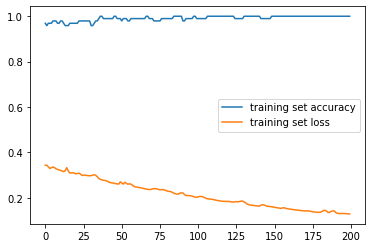

In [ ]:
plt.plot(train.history['accuracy'],label ='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
import random

while True:
  texts_p = []
  prediction_input = input('You: ')

  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  output = model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("Karen: ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break


Karen:  Ooooo Hello, looking for someone or something?
Karen:  Right now i'm in developing stage as soon i'm developed, I can do everything
Karen:  Before mans talk choose: Fuzzy Tauntaun, Bloody Rancor, Jedi Mind Trick, T-16 Skyhopper, Yub Nub, Jet Juice, Hyperdrive, Rancor Beer.
Karen:  Hello, thanks for visiting.
